<a href="https://colab.research.google.com/github/jihanurulk/Preprocessing-dataset/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#Pemanggilan data
data = pd.read_csv("produk_elektronik.csv")

In [22]:
#Menampilkan 5 data teratas
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [23]:
#Menampilkan 5 data terakhir
data.tail(5)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany
549,550,Produk_550,Tablet,388.0,4.3,240.0,Germany


In [24]:
#Melihat statistika deskriptif dari data
data.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


# 1b.  Tampilan Informasi Tipe Data Setiap Kolom dan Mengecek *Missing Values*

In [25]:
#Menampilkan informasi tipe data setiap kolom dan mengecek missing value dari masing-masing kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut memiliki 7 kolom, dengan jumlah maksimal baris untuk setiap kolomnya yaitu sebanyak 550 baris.

**Tipe data** kolom produk_id yaitu int64; tipe data kolom nama_produk, kategori, dan negara_asal yaitu object; serta tipe data kolom harga, rating, dan jumlah_ulasan yaitu float64.

Tetapi pada kolom harga, rating, dan jumlah_ulasan memiliki jumlah baris kurang dari 550, berarti **terdapat *missing value* di ketiga kolom** tersebut. Sehingga, akan dilakukan proses identifikasi lebih lanjut.

# 2a. Deteksi Missing Value pada Dataset Tiap Kolom

In [26]:
#Mengetahui jumlah missing value di setiap kolom data
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


Berdasarkan output summarize di atas, diperoleh bahwa kolom yang terdapat *missing value* (blanks/ N/A (Python : nan atau NaN)) adalah kolom harga dengan 30 *missing value*, kolom rating dengan 50 *missing value*, dan kolom jumlah_ulasan dengan 20 *missing value*.

In [27]:
#Melihat missing value pada data
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [28]:
#Mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

100

Berdasarkan output di atas, diperoleh bahwa jumlah *missing value* di seluruh dataset yaitu 100 *missing value*.

# 2b. Bagaimana Keberadaan *Missing Values* dapat Memengaruhi Analisis Data?

*Missing value* yang ada pada dataset dapat menyebabkan kesalahan hasil analisis dan kesimpulan yang tidak sesuai dengan yang diharapkan. Selain itu, ada beberapa mesin algoritma yang tidak memperbolehkan adanya *missing value* dalam sebuah data. Berikut beberapa hal yang dapat diakibatkan oleh adanya *missing value*.
*   Bias statistik
    
    *Missing values* dapat menyebabkan bias dalam perhitungan statistik deskriptif seperti rata-rata dan deviasi standar. Hal ini dapat mengakibatkan representasi yang tidak akurat dari distribusi data sebenarnya.
*   Pengurangan daya inferensial
    
    Keberadaan *missing values* dapat mengurangi kekuatan statistik dan akurasi hasil pengujian hipotesis. Hal ini membuat interpretasi hasil menjadi kurang.
*   Ketidakpastian dalam pengambilan keputusan
   
    Keberadaan *missing values* dapat menimbulkan ketidakpastian dalam proses pengambilan keputusan. Keputusan yang diambil berdasarkan data yang tidak lengkap dapat memiliki konsekuensi yang tidak diinginkan.
*   Gangguan pada konsistensi dan kelangsungan analisis
   
    *Missing values* dapat mengganggu konsistensi analisis data, terutama jika penanganan yang konsisten tidak diterapkan. Hal ini dapat menghambat proses pengembangan model dan evaluasi kinerja.

Dalam *machine learning*, *missing values* adalah masalah umum yang harus ditangani sebelum model dapat digunakan. Ada beberapa metode untuk menangani *missing values*, tergantung pada jenis data dan karakteristik distribusinya. Dalam proses *preprocessing* dataset ini akan dilakukan penanganan *missing value* pada kolom harga, rating, dan jumah_ulasan

# 2c dan 2d bagian 1: Penanganan Missing Value pada Kolom harga

In [29]:
#Melihat isi dalam kolom harga
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

In [30]:
#Mengetahui jumlah missing value kolom harga
np.sum(data['harga'].isnull())

30

Berdasarkan output tersebut, dapat dilihat bahwa kolom harga mengandung detail *missing values* 'nan' dengan total jumlah *missing value* yaitu 30. Sehingga perlu untuk mengisi *missing value* tersebut.

Jika terdapat *missing values* (nan), kita bisa mengisinya dengan beberapa metode:

1. Gunakan Mean, jika distribusi normal dan tidak ada angka ekstrem. Bisa
   digunakan jika rata-rata harga produk cukup stabil. Rata-rata dapat berupa desimal.
2. Gunakan Median, jika ada outlier, seperti produk tanpa harga atau banyak
   harga. Median lebih aman jika ada produk dengan harga yang jauh lebih banyak dari yang lain.
3. Gunakan Mode, jika sebagian besar produk memiliki harga yang sama.

Berdasarkan uji normalitas menggunakan Kolmogorov-Smirnov pada SPSS menunjukkan bahwa data pada kolom harga memperoleh nilai sig = 0,000 < 0,05, artinya data tidak berdistribusi normal. Kemudian terdapat angka ekstrem pada data harga.
Sehingga ada dua kemungkinan untuk mengisi *missing value* yang dapat dipilih, yaitu median atau modus.

Jika kita tidak mengecek distribusi data, maka kita harus membuat asumsi yang logis dan umum berdasarkan jenis data yang kita miliki. Berikut ssumsi untuk kolom harga produk:
Harga adalah data numerik (kontinu) yang menunjukkan harga produk. Sebagian besar produk memiliki harga yang standar. Data harga bisa saja memiliki outlier (produk murah vs. produk sangat mahal). Berdasarkan asumsi ini, ada dua skenario logis untuk mengisi *missing values*:
*   Jika mayoritas produk berharga standar, gunakan mean. Jika terdapat banyak
    produk murah dan sangat mahal (*skewed*), gunakan median. Karena kita tidak mengecek distribusi data, kita bisa menggunakan pendekatan standar dalam analisis data.
*   Jika tidak yakin dan ingin pendekatan aman, gunakan median karena lebih
    tahan terhadap outlier. Jika outlier bisa diabaikan atau kita asumsikan tidak ada, gunakan mean.

Ternyata setelah dilakukan identifikasi outlier menggunakan IQR, diperoleh bahwa tidak terdapat outlier pada kolom harga.
Oleh karena data pada kolom harga data tidak berdistribusi normal dan terdapat outlier sebanyak 14 outlier, sehingga untuk **mengisi missing value pada kolom harga akan menggunakan median**.

In [31]:
#Mengisi missing value pada kolom harga mengggunakan median
data['harga']=data['harga'].fillna(data['harga'].median())

In [32]:
#Mengetahui jumlah missing value pada kolom harga setelah dilakukan pengisian missing value
np.sum(data['harga'].isnull())

0

In [33]:
#Melihat isi dalam kolom harga
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,  5.160e+02,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  4.480e+02,  7.360e+02,  2.280e+02,  1.830e+02,
        5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,  5.910e+02,
        5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,  4.290e+02,
        2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,  3.850e+02,
        2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,  6.070e+02,
        6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,  3.300e+02,
        4.900e+02, -1.200e+01,  1.200e+02,  6.190e+02,  4.660e

Setelah dilakukan pengisian *missing value* pada kolom harga menggunakan Median, dapat dilihat bahwa sudah tidak ada lagi 'nan' atau *missing value* pada kolom harga.

# 2c dan 2d bagian 2: Penanganan Missing Value pada Kolom rating

In [34]:
#Melihat isi dalam kolom rating
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

In [35]:
#Melihat jumlah missing value pada kolom rating
np.sum(data['rating'].isnull())

50

Berdasarkan output tersebut, dapat dilihat bahwa kolom rating mengandung detail *missing value* 'nan' dengan total jumlah *missing value* yaitu 50. Sehingga perlu untuk mengisi *missing value* tersebut.

Jika terdapat *missing value* (nan), kita bisa mengisinya dengan beberapa metode:

1. Gunakan mean, jika distribusi normal dan tidak ada angka ekstrem. Bisa
   digunakan jika rata-rata rating produk cukup stabil. Rata-rata dapat berupa desimal.
2. Gunakan median, jika ada outlier, seperti produk tanpa rating atau banyak
   rating. Median lebih aman jika ada produk dengan rating yang jauh lebih tinggi dari yang lain.
3. Gunakan mode, jika sebagian besar produk memiliki rating yang sama.

Berdasarkan uji normalitas menggunakan Kolmogorov-Smirnov pada SPSS menunjukkan bahwa data pada kolom rating memperoleh nilai sig = 0,000 < 0,05, artinya data tidak berdistribusi normal. Tetapi, tidak ada angka ekstrem pada kolom rating karena rating berkisar antara 3.1 sampai 4.9; dan rata-rata rating cukup stabil.
Sehingga ada dua kemungkinan untuk mengisi missing value yang dapat dipilih, yaitu mean atau median.

Jika kita tidak mengecek distribusi data, maka kita harus membuat asumsi yang logis dan umum berdasarkan jenis data yang kita miliki. Berikut ssumsi untuk kolom rating produk:
Rating adalah data numerik (kontinu) yang menunjukkan rating dari produk. Sebagian besar produk memiliki rating yang standar. Data rating bisa saja memiliki outlier (produk dengan rating rendah vs. produk dengan rating yang sangat tinggi mahal). Berdasarkan asumsi ini, ada dua skenario logis untuk mengisi *missing values*:
*   Jika mayoritas produk memiliki rating standar, gunakan mean. Jika terdapat
    banyak produk dengan rating rendah dan rating yang sangat tinggi (*skewed*), gunakan median. Karena kita tidak mengecek distribusi data, kita bisa menggunakan pendekatan standar dalam analisis data.
*   Jika tidak yakin dan ingin pendekatan aman, gunakan median karena lebih
    tahan terhadap outlier. Jika outlier bisa diabaikan atau kita asumsikan tidak ada, gunakan mean.

Ternyata setelah dilakukan identifikasi outlier menggunakan IQR, diperoleh bahwa tidak terdapat outlier pada kolom rating.
Oleh karena data pada kolom rating data tidak berdistribusi normal dan tidak terdapat outlier, sehingga **untuk mengisi missing value pada kolom rating akan menggunakan mean**.

In [36]:
#Mengisi missing value pada kolom rating mengggunakan mean
data['rating']=data['rating'].fillna(data['rating'].mean())

In [37]:
#Melihat jumlah missing value pada kolom rating
np.sum(data['rating'].isnull())

0

In [38]:
#Melihat isi dalam kolom rating
data['rating'].unique()

array([4.2   , 3.5   , 3.8   , 3.2   , 3.7   , 4.    , 4.5   , 3.    ,
       3.9   , 3.6   , 4.7   , 4.4   , 4.0056, 3.1   , 4.9   , 4.6   ,
       5.    , 4.8   , 4.3   , 3.4   , 4.1   , 3.3   ])

Setelah dilakukan pengisian missing value pada kolom rating menggunakan Mode, dapat dilihat bahwa sudah tidak ada lagi 'nan' atau missing value pada kolom rating.

# 2c dan 2d bagian 3: Penanganan Missing Value pada Kolom jumlah_ulasan

In [39]:
#Melihat isi dalam kolom jumlah_ulasan
data['jumlah_ulasan'].unique()

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 296., 312., 320., 217., 115.,
       455., 167., 130.,  64., 409.,  21., 154., 405., 145., 477.,  12.,
       153.,  39., 246., 288., 357., 113., 127.,  14., 257., 373., 330.,
       158.,  93., 463., 475., 465., 240., 297., 170., 281., 469.,  47.,
       235., 151., 301., 490., 160., 123.,  75., 370., 350., 484., 258.,
       466., 458., 340., 332., 189., 199., 416., 163., 205., 271., 428.,
       415., 436., 152., 351., 110., 253., 499., 248.,  58.,  51., 175.,
        91., 438., 225., 471., 143., 345.,  16., 445.,  23.,  82., 408.,
       414., 172., 356., 215., 285., 265., 275.,  34., 459., 290., 262.,
       319., 298., 173., 104., 119., 247., 396., 492., 434., 399., 150.,
       126., 491., 401., 461.,  88.,  77., 182., 453., 137., 105., 101.,
        40., 343.,  29., 155., 325., 456., 169., 35

In [40]:
#Melihat jumlah missing value pada kolom jumlah_ulasan
np.sum(data['jumlah_ulasan'].isnull())

20

Berdasarkan output tersebut, dapat dilihat bahwa kolom jumlah_ulasan mengandung detail *missing value* 'nan' dengan total jumlah *missing value* yaitu 20. Sehingga perlu untuk mengisi *missing value* tersebut.

Jika terdapat *missing value* (nan), kita bisa mengisinya dengan beberapa metode:

1. Gunakan Mean, jika distribusi normal dan tidak ada angka ekstrem. Bisa
   digunakan jika rata-rata jumlah_ulasan produk cukup stabil. Rata-rata dapat berupa desimal.
2. Gunakan Median, jika ada outlier, seperti produk tanpa jumlah_ulasan atau
   banyak jumlah_ulasan. Median lebih aman jika ada produk dengan jumlah_ulasan yang jauh lebih tinggi dari yang lain.
3. Gunakan Mode, jika sebagian besar produk memiliki jumlah_ulasan yang sama.

Berdasarkan uji normalitas menggunakan Kolmogorov-Smirnov pada SPSS menunjukkan bahwa data pada kolom jumlah_ulasan memperoleh nilai sig = 0,000 < 0,05, artinya data tidak berdistribusi normal.
Sehingga ada dua kemungkinan untuk mengisi *missing value* yang dapat dipilih, yaitu median atau modus.

Jika kita tidak mengecek distribusi data, maka kita harus membuat asumsi yang logis dan umum berdasarkan jenis data yang kita miliki. Berikut ssumsi untuk kolom jumlah_ulasan produk:
Jumlah_ulasan adalah data numerik (kontinu) yang menunjukkan jumlah_ulasan dari produk. Sebagian besar produk memiliki jumlah_ulasan yang standar. Data jumlah_ulasan bisa saja memiliki outlier (produk dengan jumlah_ulasan rendah vs. produk dengan jumlah_ulasan yang sangat tinggi). Berdasarkan asumsi ini, ada dua skenario logis untuk mengisi *missing values*:
*   Jika mayoritas produk memiliki jumlah_ulasan standar, gunakan mean. Jika
    terdapat banyak produk dengan jumlah_ulasan rendah dan jumlah_ulasan yang sangat tinggi (skewed), gunakan median. Karena kita tidak mengecek distribusi data, kita bisa menggunakan pendekatan standar dalam analisis data.
*   Jika tidak yakin dan ingin pendekatan aman, gunakan median karena lebih
    tahan terhadap outlier. Jika outlier bisa diabaikan atau kita asumsikan tidak ada, gunakan mean.

Ternyata setelah dilakukan identifikasi outlier menggunakan IQR, diperoleh bahwa tidak terdapat outlier pada kolom jumlah_ulasan.
Oleh karena data pada kolom ratjumlah_ulasaning data tidak berdistribusi normal dan tidak terdapat outlier, sehingga **untuk mengisi missing value pada kolom rating akan menggunakan median**.

In [41]:
#Mengisi missing value pada kolom jumlah_ulasan menggunakan Median
data['jumlah_ulasan']=data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].median())

In [42]:
#Mengetahui jumlah missing value pada kolom jumlah_ulasan setelah dilakukan pengisian missing value
np.sum(data['jumlah_ulasan'].isnull())

0

In [43]:
#Melihat isi dalam kolom jumlah_ulasan
data['jumlah_ulasan'].unique()

array([273. , 239. , 209. ,  59. ,  76. , 309. , 390. ,  67. , 268. ,
       262.5, 335. , 139. , 224. , 181. , 267. , 111. , 218. , 300. ,
       363. , 480. , 295. , 125. , 159. , 451. ,  45. , 462. , 342. ,
       486. , 296. , 312. , 320. , 217. , 115. , 455. , 167. , 130. ,
        64. , 409. ,  21. , 154. , 405. , 145. , 477. ,  12. , 153. ,
        39. , 246. , 288. , 357. , 113. , 127. ,  14. , 257. , 373. ,
       330. , 158. ,  93. , 463. , 475. , 465. , 240. , 297. , 170. ,
       281. , 469. ,  47. , 235. , 151. , 301. , 490. , 160. , 123. ,
        75. , 370. , 350. , 484. , 258. , 466. , 458. , 340. , 332. ,
       189. , 199. , 416. , 163. , 205. , 271. , 428. , 415. , 436. ,
       152. , 351. , 110. , 253. , 499. , 248. ,  58. ,  51. , 175. ,
        91. , 438. , 225. , 471. , 143. , 345. ,  16. , 445. ,  23. ,
        82. , 408. , 414. , 172. , 356. , 215. , 285. , 265. , 275. ,
        34. , 459. , 290. , 262. , 319. , 298. , 173. , 104. , 119. ,
       247. , 396. ,

Setelah dilakukan pengisian *missing value* pada kolom jumlah_ulasan menggunakan median, dapat dilihat bahwa sudah tidak ada lagi 'nan' atau *missing value* pada kolom jumlah_ulasan.

In [44]:
#Melihat jumlah missing value setiap kolom data
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,0
rating,0
jumlah_ulasan,0
negara_asal,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Setelah mengisi *missing value* pada kolom harga, rating, dan jumlah_ulasan, terlihat bahwa jumlah baris di setiap kolom dataset sudah mencapai 550 baris. Artinya, sudah tidak ada lagi missing value pada dataset.

# 3a. Identifikasi Outlier dalam Dataset

Cek Outlier dapat dideteksi menggunakan beberapa metode:
1.   Boxplot → Visualisasi distribusi dan outlier
2.   Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

1. Boxplot

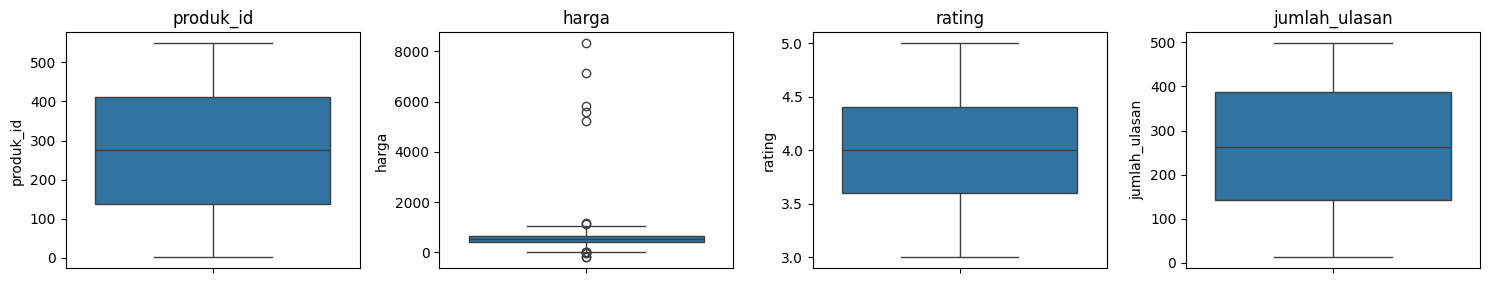

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['produk_id','harga', 'rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

2. IQR

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

produk_id: 0 outliers
harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


Berdasarkan IQR, terdapat 14 outliers pada kolom harga.

# 3b. Apa Dampak dari Keberadaan Outlier terhadap Analisis?

Outlier dapat memiliki dampak yang signifikan terhadap data analisis dan juga hasilnya. Berikut adalah beberapa dampak utama dari adanya outlier.
*   Pengaruh pada statistik deskriptif
   
    Outlier dapat mempengaruhi statistik deskriptif seperti mean, varians, dan deviasi standar. Misalnya, mean bisa menjadi sangat terdistorsi oleh beberapa outlier yang sangat tinggi atau rendah.
*   Pengaruh pada model statistik

    Pada regresi atau model statistik lainnya, outlier dapat mempengaruhi parameter model dan menghasilkan prediksi yang kurang akurat.
*   Masalah pada kengambilan keputusan

    Jika outlier tidak ditangani dengan benar, keputusan yang diambil berdasarkan data dapat menjadi tidak valid atau menyesatkan.

# 3c. Metode Penanganan Outlier

Berdasarkan jumlah dan dampak outlier, ada beberapa metode yang bisa digunakan:
1.   Winsorizing, mengganti outlier dengan batas IQR
     
     Jika data penting dan tidak boleh dihapus, kita bisa mengganti outlier dengan batas kuartil.
2.   Menghapus outlier, jika jumlahnya sedikit dan tidak signifikan)
     
     Jika jumlah outlier sangat sedikit dan tidak mempengaruhi distribusi data, bisa dihapus.

Oleh karena data harga, rating, dan jumlah_ulasan produk itu penting, maka akan digunakan Winsorizing untuk mengganti outlier dengan batas IQR. Tidak menghapus outlier, karena dapat mempengaruhi dimensi data.

# 3d. Penanganan Outlier

In [49]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

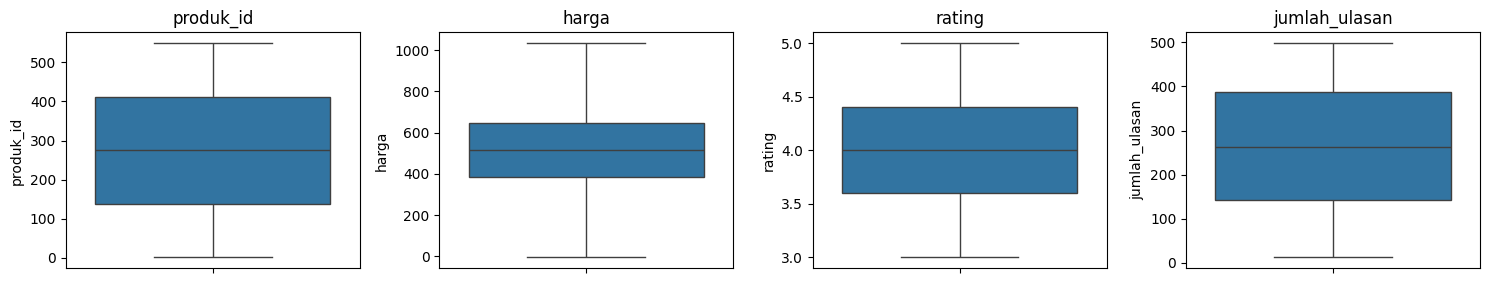

In [50]:
#Cek boxplot lagi

num_cols = ['produk_id','harga', 'rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [51]:
# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

produk_id: 0 outliers
harga: 0 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


Setelah dilakukan penanganan outlier, data tersebut sudah tidak memiliki outlier lagi.

# 4a. Encoding Data Kategorik

Encoding adalah proses mengubah data kategorik menjadi bentuk numerik agar dapat digunakan dalam algoritma *Machine Learning*. Model *Machine Learning* umumnya hanya dapat bekerja dengan angka, sehingga data kategorik harus dikonversi terlebih dahulu sebelum digunakan dalam pemodelan.

Metode Encoding dalam Machine Learning Ada beberapa metode encoding yang umum digunakan, tergantung pada jenis dan karakteristik data kategorik:
1.   *One-Hot Encoding* (OHE): mengubah kategori menjadi beberapa kolom biner (0/1). Digunakan jika jumlah kategori tidak terlalu banyak (menghindari dimensionalitas tinggi) hal ini akan menambah dimensi kolom data.
2.   *Ordinal Encoding*: mengubah kategori menjadi angka berurutan (0,1,2,..). Digunakan jika kategori memiliki urutan yang jelas (misalnya pendidikan: SD < SMP < SMA).
3.   *Target Encoding*: menggunakan rata-rata target (misalnya rata-rata harga produk berdasarkan asal negara) untuk mengganti kategori. Digunakan jika data memiliki hubungan statistik yang kuat dengan target.
4.   *Frequency Encoding*: mengubah setiap negara menjadi jumlah kemunculannya dalam dataset.
5.   *Regional Encoding*







Terdapat dua kolom kategorik yang memerlukan encoding, yaitu sebagai berikut.
1.   kategori → Berisi jenis produk
2.   negara_asal → Berisi negara asal produk

# 4b bagian 1: Encoding pada Kolom Kategori

In [52]:
#Melihat isi dalam kolom kategori
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

Kolom kategori berisi jenis produk, jadi tidak memiliki urutan yang jelas dan jumlah kategori tidak terlalu banyak, yaitu berjumlah 5. Sehingga menggunakan *One-Hot Encoding* untuk memudahkan dalam mengubah kategori.

*One-Hot Encoding* untuk kolom kategori:

In [53]:
from sklearn.preprocessing import OneHotEncoder
One_encoder = OneHotEncoder()

In [54]:
One_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [55]:
encoded_kategori = One_encoder.fit_transform(data[['kategori']])

In [56]:
encoded_kategori

,kategori_Camera,kategori_Headphone,kategori_Laptop,kategori_Smartphone,kategori_Smartwatch,kategori_Tablet
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
545,0.0,0.0,1.0,0.0,0.0,0.0
546,0.0,1.0,0.0,0.0,0.0,0.0
547,0.0,0.0,0.0,0.0,0.0,1.0
548,0.0,0.0,1.0,0.0,0.0,0.0


Setelah dilakukan perubahan kategori, data kolom kategori produk sudah berubah menjadi kolom biner.

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    float64
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(4), object(3)
memory usage: 30.2+ KB


# 4b bagian 1: Encoding pada Kolom Negara Asal

In [58]:
#Melihat isi dalam kolom negara_asal
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

Kolom negara-asal berisi negara asal dari setiap produk dengan jumlah 9 negara. Oleh karena asal_negara tidak memiliki urutan yang jelas, jumlah kategori cukup banyak, sehingga menggunakan *regional encoding* untuk mengkategorikan asal_negara berdasarkan benuanya dan *regional encoding* memiliki resiko yang lebih kecil dibanding yang lain.

*Regional encoding* untuk kolom negara_asal:

In [59]:
# Buat dictionary untuk mapping negara_asal produk ke region
negara_asal_ke_region = {
    'India': 'Asia', 'Germany': 'Eropa', 'South Korea': 'Asia', 'France': 'Eropa',
    'UK': 'Eropa', 'Canada': 'Eropa', 'USA': 'Eropa', 'Japan': 'Asia', 'China': 'Asia',
}

# Ubah negara_asal menjadi region
data['negara_asal_region'] = data['negara_asal'].map(negara_asal_ke_region).fillna('Others')

# One-Hot Encoding pada region
data = pd.get_dummies(data, columns=['negara_asal_region'], prefix='region')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    float64
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
 7   region_Asia    550 non-null    bool   
 8   region_Eropa   550 non-null    bool   
dtypes: bool(2), float64(4), object(3)
memory usage: 31.3+ KB
